In [1]:
### Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from datetime import datetime
### Seaborn style
sns.set_style("whitegrid")

In [2]:
### Let's import our data
train_data = pd.read_csv(r'C:\Users\manaswini.nayak\Downloads\sample_user_data.csv',index_col='fullVisitorId')



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_data.drop('device_mobileDeviceModel',  axis=1 , inplace = True)

In [4]:
### and test if everything OK
train_data.head()

,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,geoNetwork_city,channelGrouping
fullVisitorId,,,,,,,,,,,,,,,
27376579751715,1,20170211,1486866293,NaN,5.0,49.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Organic Search
39460501403861,1,20170327,1490629516,NaN,2.0,99.0,NaN,NaN,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,Social
40862739425590,1,20170211,1486836571,NaN,2.0,14.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search
40862739425590,2,20170211,1486838824,NaN,3.0,35.0,NaN,NaN,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search
62267706107999,1,20170709,1499645960,1.0,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,Affiliates


In [5]:
train_data.isnull().sum()

visitNumber                            0
date                                   0
visitStartTime                         0
totals_bounces                    232332
totals_pageviews                      52
totals_timeOnSite                 233021
totals_totalTransactionRevenue    458396
totals_transactions               458396
trafficSource_source                   0
trafficSource_medium                   0
trafficSource_campaign                 0
device_deviceCategory                  0
device_operatingSystem                 0
geoNetwork_city                        0
channelGrouping                        0
dtype: int64

In [6]:
#date field feature extraction
train_data['date'] = pd.to_datetime(train_data.date,format='%Y%m%d')

In [7]:
train_data['month of visit'] = train_data['date'].dt.month

In [8]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train_data['date'].apply(applyer) 
train_data['weekend visit']=temp2

In [9]:
import datetime
train_data['totals_bounces'] = datetime.datetime.utcfromtimestamp(1486866293).hour

In [10]:
#imputation of non-bounced session
train_data['totals_bounces'] = train_data['totals_bounces'].fillna(0)

In [11]:
import datetime
train_data['visit hour'] = train_data['visitStartTime'].apply(lambda x : datetime.datetime.utcfromtimestamp(x).hour)

In [12]:
train_data = train_data.dropna(axis=0, subset=['totals_pageviews']) 

In [13]:
train_data[train_data.totals_timeOnSite.isna()].head(5)

,visitNumber,date,visitStartTime,totals_bounces,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,geoNetwork_city,channelGrouping,month of visit,weekend visit,visit hour
fullVisitorId,,,,,,,,,,,,,,,,,,
62267706107999,1,2017-07-09,1499645960,2,1.0,NaN,NaN,NaN,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,Affiliates,7,1,0
85059828173212,1,2017-07-19,1500505105,2,1.0,NaN,NaN,NaN,(direct),(none),(not set),mobile,iOS,Chicago,Direct,7,0,22
176652019531658,1,2017-01-16,1484597865,2,1.0,NaN,NaN,NaN,youtube.com,referral,(not set),desktop,Linux,not available in demo dataset,Social,1,0,20
197671390269035,1,2017-05-02,1493772870,2,1.0,NaN,NaN,NaN,m.facebook.com,referral,(not set),mobile,Android,not available in demo dataset,Social,5,0,0
450371054833295,1,2017-07-17,1500303787,2,1.0,NaN,NaN,NaN,sites.google.com,referral,(not set),desktop,Linux,New York,Referral,7,0,15


In [14]:
train_data["totals_totalTransactionRevenue"][train_data.totals_transactions.isna()].unique()

array([nan])

In [15]:
train_data["totals_timeOnSite"][train_data.totals_transactions.isna()].unique()

array([  49.,   99.,   14., ..., 3995., 4471., 2484.])

In [16]:
#imputation of no transaction
train_data['totals_totalTransactionRevenue'] = train_data['totals_totalTransactionRevenue'].fillna(0)

In [17]:
#imputation of no transactions
train_data['totals_transactions'] = train_data['totals_transactions'].fillna(0)

In [18]:
# model to impute  totals_timeOnSite

In [19]:
train_impute = train_data.copy()

In [20]:
train_impute.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464652 entries, 27376579751715 to 9999986437109498564
Data columns (total 18 columns):
visitNumber                       464652 non-null int64
date                              464652 non-null datetime64[ns]
visitStartTime                    464652 non-null int64
totals_bounces                    464652 non-null int64
totals_pageviews                  464652 non-null float64
totals_timeOnSite                 231668 non-null float64
totals_totalTransactionRevenue    464652 non-null float64
totals_transactions               464652 non-null float64
trafficSource_source              464652 non-null object
trafficSource_medium              464652 non-null object
trafficSource_campaign            464652 non-null object
device_deviceCategory             464652 non-null object
device_operatingSystem            464652 non-null object
geoNetwork_city                   464652 non-null object
channelGrouping                   464652 non-null object
mont

In [21]:
train_impute.dropna(inplace = True)

In [22]:
X = train_impute.loc[ : , ("visitNumber" ,"totals_bounces" , "totals_pageviews" , "totals_totalTransactionRevenue" , "totals_transactions")].values

In [23]:
y = train_impute.loc[: , "totals_timeOnSite"].values

In [24]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
X = train_data.loc[:, ("visitNumber" ,"totals_bounces" , "totals_pageviews" , "totals_totalTransactionRevenue" , "totals_transactions")].values
y = regressor.predict(X)

In [26]:
def replace_nan(x):
    if np.isnan(x['totals_timeOnSite']):
            return  float(regressor.predict(np.array(x[["visitNumber" ,"totals_bounces" , "totals_pageviews" , "totals_totalTransactionRevenue" , "totals_transactions"]]).reshape(1, -1)))
    else:
            return  x['totals_timeOnSite']
        

In [27]:
train_data['totals_timeOnSite'] = train_data.apply(lambda x:replace_nan(x) ,axis = 1)

In [28]:
df = train_data.copy()

In [29]:
df["Transaction"] = df["totals_transactions"] > 0


In [30]:
train_data["Transaction"] = train_data["totals_transactions"] > 0

##EXPLORATORY DATA ANALYSIS

In [31]:
pd.DataFrame(train_data.dtypes)

,0
visitNumber,int64
date,datetime64[ns]
visitStartTime,int64
totals_bounces,int64
totals_pageviews,float64
totals_timeOnSite,float64
totals_totalTransactionRevenue,float64
totals_transactions,float64
trafficSource_source,object
trafficSource_medium,object


In [32]:

numerical_features = ['visitNumber','totals_bounces','totals_pageviews' , 'totals_timeOnSite']
nominal_features = ['trafficSource_source','trafficSource_medium','trafficSource_campaign','device_deviceCategory','device_operatingSystem','channelGrouping','Transaction' ,'visit hour', 'month of visit' , 'weekend visit']


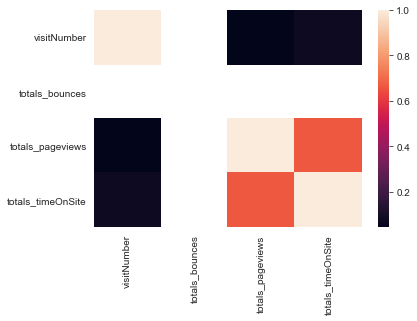

In [33]:
corrmatrix = train_data[numerical_features].corr()
sns.heatmap(corrmatrix)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currentl

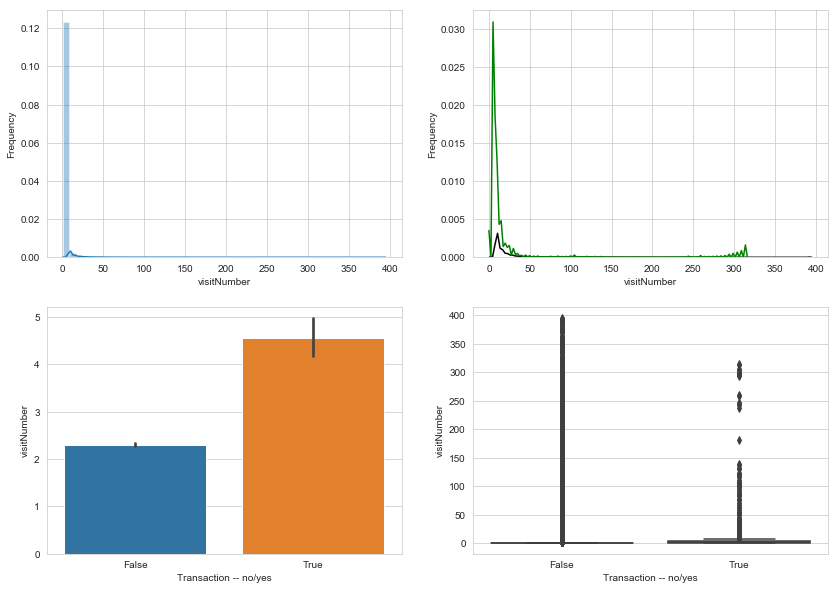

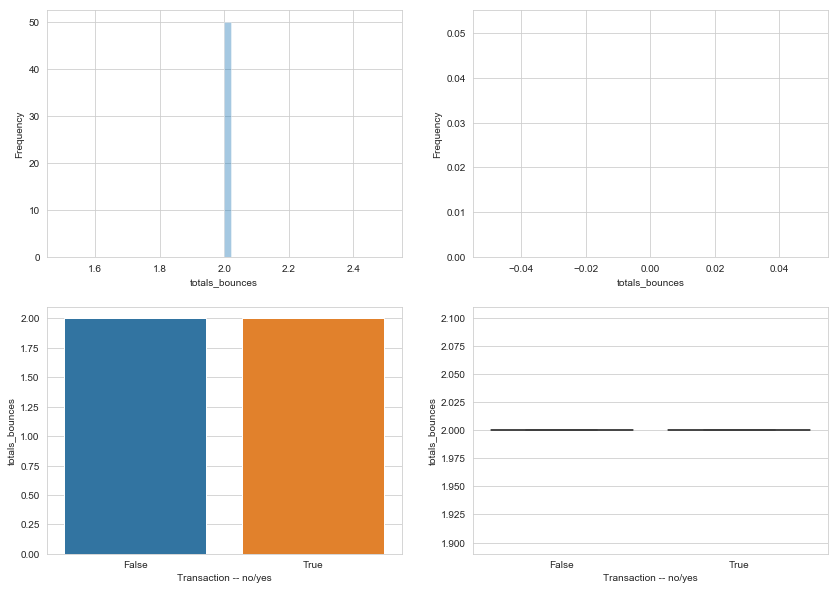

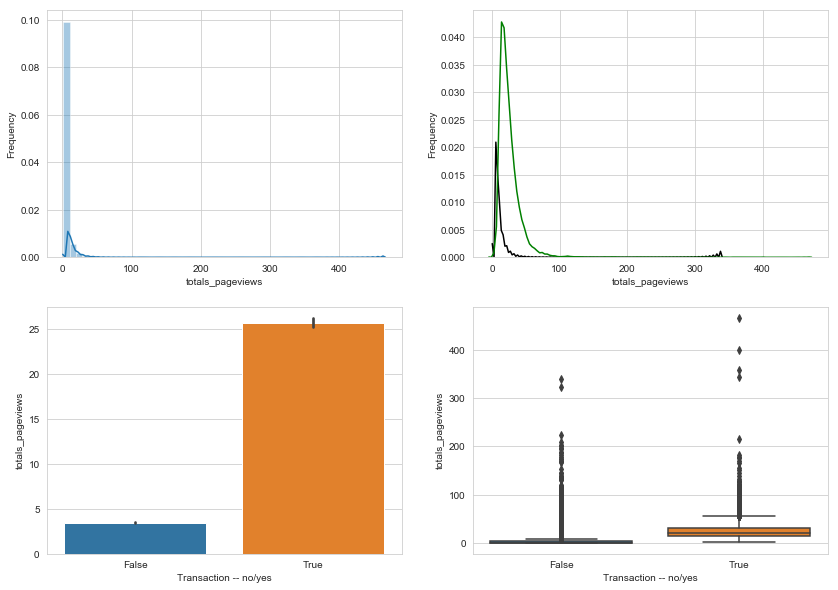

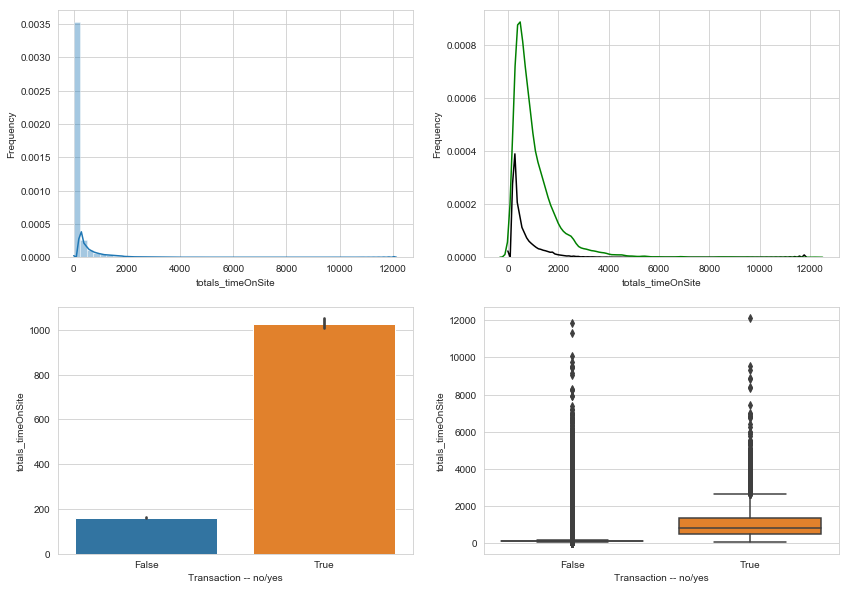

In [34]:
for column in numerical_features:
    fig = plt.figure(figsize=(14,10))
    sns.distplot(train_data[column] , ax = plt.subplot(2,2,1))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    sns.distplot(train_data[train_data["Transaction"]==0][column], color = "black" , hist = False , ax= plt.subplot(2,2,2))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    sns.distplot(train_data[train_data["Transaction"]==1][column] , color = "green" , hist = False ,  ax= plt.subplot(2,2,2))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    sns.barplot(x="Transaction" , y= column , data = train_data , ax= plt.subplot(2,2,3))
    plt.xlabel("Transaction -- no/yes")
    sns.boxplot(x="Transaction" , y= column , data = train_data , ax= plt.subplot(2,2,4))
    plt.xlabel("Transaction -- no/yes")

In [35]:
df.drop(["totals_totalTransactionRevenue" , "totals_transactions" , "date","visitStartTime"],  axis=1 , inplace = True)

In [36]:
df.head()

,visitNumber,totals_bounces,totals_pageviews,totals_timeOnSite,trafficSource_source,trafficSource_medium,trafficSource_campaign,device_deviceCategory,device_operatingSystem,geoNetwork_city,channelGrouping,month of visit,weekend visit,visit hour,Transaction
fullVisitorId,,,,,,,,,,,,,,,
27376579751715,1,2,5.0,49.000000,(direct),(none),(not set),desktop,Macintosh,not available in demo dataset,Organic Search,2,1,2,False
39460501403861,1,2,2.0,99.000000,youtube.com,referral,(not set),desktop,Windows,not available in demo dataset,Social,3,0,15,False
40862739425590,1,2,2.0,14.000000,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2,1,18,False
40862739425590,2,2,3.0,35.000000,(direct),(none),(not set),desktop,Macintosh,Oakland,Paid Search,2,1,18,False
62267706107999,1,2,1.0,66.158531,Partners,affiliate,Data Share Promo,desktop,Windows,not available in demo dataset,Affiliates,7,1,0,False


In [37]:
dummy = pd.get_dummies(df[['trafficSource_source','trafficSource_medium','trafficSource_campaign','device_deviceCategory','device_operatingSystem','channelGrouping' , 'month of visit','weekend visit','visit hour']] , drop_first = True)

In [38]:
dummy.head()

,month of visit,weekend visit,visit hour,trafficSource_source_(not set),trafficSource_source_9to5google.com,trafficSource_source_Partners,trafficSource_source_ad.doubleclick.net,trafficSource_source_admin.globalaccess.com,trafficSource_source_adwords.google.com,trafficSource_source_amazon.com,...,device_operatingSystem_Windows Phone,device_operatingSystem_Xbox,device_operatingSystem_iOS,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social
fullVisitorId,,,,,,,,,,,,,,,,,,,,,
27376579751715,2,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39460501403861,3,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
40862739425590,2,1,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40862739425590,2,1,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
62267706107999,7,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
df.drop('geoNetwork_city', axis = 1 , inplace = True)

In [40]:
df = pd.concat([df , dummy] , axis = 1)

In [41]:
df.drop(['trafficSource_source','trafficSource_medium','trafficSource_campaign','device_deviceCategory','device_operatingSystem','channelGrouping' , 'month of visit','weekend visit','visit hour'], axis = 1 , inplace = True)

In [42]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Transaction']= label_encoder.fit_transform(df['Transaction']) 

In [43]:
df['Transaction'].value_counts()

0    458344
1      6308
Name: Transaction, dtype: int64

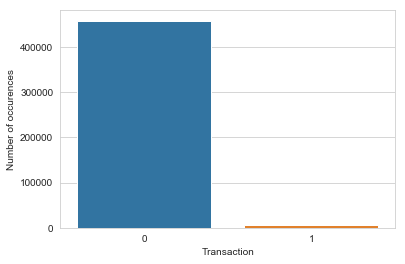

In [44]:
#target exploration
sns.countplot(df.Transaction)
plt.xlabel('Transaction')
plt.ylabel('Number of occurences')
plt.show()

#DECISION TREE MODELLING

In [45]:
# Train-Test split: 20% test data
X = df.drop('Transaction', 1)
y = df.Transaction
data_train, data_test, label_train, label_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [46]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [47]:
method = RandomOverSampler()

In [48]:
X_resampled , y_resampled = method.fit_sample(X,y)
data_train, data_test, label_train, label_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 50)

In [49]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.9499548841246663
Testing score:  0.9502194489594811


In [50]:
# Decision tree with depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(data_train, label_train)
dt3_score_train = dt3.score(data_train, label_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(data_test, label_test)
print("Testing score: ",dt3_score_test)

Training score:  0.9512717378261161
Testing score:  0.9514448723123411


In [51]:
# Decision tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.9552316493709491
Testing score:  0.9556811281167389


In [52]:
# Decision tree with depth = 6
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.9579370434842235
Testing score:  0.9583246971895261


In [53]:
# Decision tree: To the full depth
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  0.9998067575633376
Testing score:  0.9940328791630758


In [54]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.9499548841246663   0.9502194489594811
3        0.9512717378261161   0.9514448723123411
4        0.9552316493709491   0.9556811281167389
6        0.9579370434842235   0.9583246971895261
max      0.9998067575633376   0.9940328791630758


It could be seen that, higher the depth, training score increases and matches perfects with the training data set. However higher the depth the tree goes, it overfit to the training data set. So it's no use keep increasing the tree depth. According to above observations, tree with a depth of 2 seems more reasonable as both training and test scores are reasonably high.

In [55]:
# Let's generate the decision tree for depth = 2

features = X.columns.tolist()


tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=features)